## Tổng quan về BLAS và LAPACK
BLAS (Basic Linear Algebra Subprograms) và LAPACK (Linear Algebra Package) là hai thư viện được tích hợp sẵn trong PyTorch để thực hiện các phép toán đại số tuyến tính trên tensor và ma trận.

BLAS cung cấp các phép toán đại số cơ bản như nhân ma trận, nhân vector, tích vô hướng, cộng/trừ hai ma trận và nhiều phép toán khác. Nó cung cấp các hàm được tối ưu hóa để thực hiện các phép toán nhanh chóng và hiệu quả trên các tensor.

LAPACK là một thư viện đại số tuyến tính chuyên sâu, cung cấp các phép toán phân tích và giải các vấn đề liên quan đến ma trận. Nó bao gồm các phép toán như phân rã ma trận, tìm giá trị riêng và vector riêng, giải hệ phương trình tuyến tính, tính định thức và nhiều phép toán khác.


## 1. Phép biến đổi và phương pháp xây dựng các ma trận đặc biệt

Các phép biến đổi ma trận thực chất cũng là các phép biến đổi của tensor hai chiều. Trong quá trình thực hiện các phép toán đại số tuyến tính thực tế, chúng ta thường gặp phải một số ma trận đặc biệt như ma trận đơn vị, ma trận đường chéo, và các loại ma trận khác.

In [23]:
import torch
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [24]:
t1 = torch.randint(1, 100, size=(3, 4))

# chuyển vị
t1, torch.t(t1), t1.t()

(tensor([[15,  7, 32, 78],
         [ 2, 15, 89, 24],
         [68, 56, 23, 52]]),
 tensor([[15,  2, 68],
         [ 7, 15, 56],
         [32, 89, 23],
         [78, 24, 52]]),
 tensor([[15,  2, 68],
         [ 7, 15, 56],
         [32, 89, 23],
         [78, 24, 52]]))

In [25]:
# ma trận đơn vị
torch.eye(7)

tensor([[1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1.]])

In [26]:
# ma trận đường chéo, chéo trên, chéo dưới

t2 = torch.randint(1, 20, size=(5, ))
t2, torch.diag(t2), torch.diag(t2, diagonal=2), torch.diag(t2, -2)

(tensor([ 6,  8, 14, 14, 12]),
 tensor([[ 6,  0,  0,  0,  0],
         [ 0,  8,  0,  0,  0],
         [ 0,  0, 14,  0,  0],
         [ 0,  0,  0, 14,  0],
         [ 0,  0,  0,  0, 12]]),
 tensor([[ 0,  0,  6,  0,  0,  0,  0],
         [ 0,  0,  0,  8,  0,  0,  0],
         [ 0,  0,  0,  0, 14,  0,  0],
         [ 0,  0,  0,  0,  0, 14,  0],
         [ 0,  0,  0,  0,  0,  0, 12],
         [ 0,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0,  0,  0]]),
 tensor([[ 0,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0,  0,  0],
         [ 6,  0,  0,  0,  0,  0,  0],
         [ 0,  8,  0,  0,  0,  0,  0],
         [ 0,  0, 14,  0,  0,  0,  0],
         [ 0,  0,  0, 14,  0,  0,  0],
         [ 0,  0,  0,  0, 12,  0,  0]]))

In [27]:
# ma trận tam giác trên

t3 = torch.randint(1, 30, size=(4, 4))
t3, torch.triu(t3), t3.triu(-1), t3.triu(1)

(tensor([[21, 22, 21,  9],
         [ 7,  7, 12, 14],
         [19,  5, 12, 14],
         [13, 24, 11, 18]]),
 tensor([[21, 22, 21,  9],
         [ 0,  7, 12, 14],
         [ 0,  0, 12, 14],
         [ 0,  0,  0, 18]]),
 tensor([[21, 22, 21,  9],
         [ 7,  7, 12, 14],
         [ 0,  5, 12, 14],
         [ 0,  0, 11, 18]]),
 tensor([[ 0, 22, 21,  9],
         [ 0,  0, 12, 14],
         [ 0,  0,  0, 14],
         [ 0,  0,  0,  0]]))

In [28]:
# ma trận tam giác dưới

t3, torch.tril(t3), t3.tril(-1), t3.tril(1)

(tensor([[21, 22, 21,  9],
         [ 7,  7, 12, 14],
         [19,  5, 12, 14],
         [13, 24, 11, 18]]),
 tensor([[21,  0,  0,  0],
         [ 7,  7,  0,  0],
         [19,  5, 12,  0],
         [13, 24, 11, 18]]),
 tensor([[ 0,  0,  0,  0],
         [ 7,  0,  0,  0],
         [19,  5,  0,  0],
         [13, 24, 11,  0]]),
 tensor([[21, 22,  0,  0],
         [ 7,  7, 12,  0],
         [19,  5, 12, 14],
         [13, 24, 11, 18]]))

## 2. Các phép toán cơ bản trên ma trận

Ma trận khác với mảng hai chiều thông thường, nó có ý nghĩa đại số tuyến tính riêng biệt và những đặc tính đặc biệt này thể hiện chủ yếu trong các phép toán cơ bản trên ma trận.

In [29]:
# dot, vdot: áp dụng với các tensor 1 chiều

t2, torch.dot(t2, t2), torch.vdot(t2, t2)

(tensor([ 6,  8, 14, 14, 12]), tensor(636), tensor(636))

In [30]:
# nhân ma trận


In [31]:
t1.shape, t3.shape, torch.mm(t1, t3)

(torch.Size([3, 4]),
 torch.Size([4, 4]),
 tensor([[1986, 2411, 1641, 2085],
         [2150, 1170, 1554, 1906],
         [2933, 3251, 2948, 2654]]))

In [32]:
# nhân ma trận cùng kích thước

t1 * t1

tensor([[ 225,   49, 1024, 6084],
        [   4,  225, 7921,  576],
        [4624, 3136,  529, 2704]])

In [33]:
# mv: nhân ma trận với vector

t4 = torch.randint(3, 22, size=(4,))

torch.mv(t1, t4), torch.mm(t1, t4.reshape(-1, 1)), torch.mm(t1, t4.reshape(-1, 1)).flatten()

(tensor([1766, 2163, 2602]),
 tensor([[1766],
         [2163],
         [2602]]),
 tensor([1766, 2163, 2602]))

In [34]:
# bmm: nhân ma trận theo lô (batch): Nhân ma trận theo lô: Nhân ma trận trong tensor ba chiều 
# là việc nhân từng cặp ma trận tại vị trí tương ứng trong tensor ba chiều. 
# Điều này yêu cầu kích thước chiều đầu tiên của hai ma trận phải giống nhau 
# và hai chiều còn lại phải thỏa mãn điều kiện của phép nhân ma trận.

t5 = torch.randint(3, 22, (3, 2, 2))
t6 = torch.randint(3, 22, (3, 2, 3))

t5, t6, torch.bmm(t5, t6)

(tensor([[[12, 10],
          [ 7,  4]],
 
         [[ 6, 19],
          [15, 18]],
 
         [[21,  4],
          [ 9, 21]]]),
 tensor([[[ 8,  4, 16],
          [13, 12,  8]],
 
         [[16, 19, 18],
          [14, 21, 20]],
 
         [[ 9, 18, 19],
          [16,  7,  4]]]),
 tensor([[[226, 168, 272],
          [108,  76, 144]],
 
         [[362, 513, 488],
          [492, 663, 630]],
 
         [[253, 406, 415],
          [417, 309, 255]]]))

In [35]:
# addmm: cộng và nhân ma trận

torch.addmm(t4, t1, t3), t4 + torch.mm(t1, t3), torch.addmm(t4, t1, t3, beta=2, alpha=3)

(tensor([[1995, 2428, 1659, 2097],
         [2159, 1187, 1572, 1918],
         [2942, 3268, 2966, 2666]]),
 tensor([[1995, 2428, 1659, 2097],
         [2159, 1187, 1572, 1918],
         [2942, 3268, 2966, 2666]]),
 tensor([[5976, 7267, 4959, 6279],
         [6468, 3544, 4698, 5742],
         [8817, 9787, 8880, 7986]]))

In [36]:
# addbmm: cộng nhân ma trận theo lô


t7 = torch.randint(3, 22, (2,3 ))
torch.addbmm(t7, t5, t6), t7+torch.bmm(t5, t6).sum(0)

(tensor([[ 859, 1090, 1182],
         [1020, 1066, 1046]]),
 tensor([[ 859, 1090, 1182],
         [1020, 1066, 1046]]))

## 3. Các phép toán đại số tuyến tính trên ma trận



In [37]:
# trace: tổng các phần tử trên đường chéo chính của ma trận, không nhất thiết cần ma trận vuông

t1, t3, torch.trace(t1), t1.trace(), t3.trace()

(tensor([[15,  7, 32, 78],
         [ 2, 15, 89, 24],
         [68, 56, 23, 52]]),
 tensor([[21, 22, 21,  9],
         [ 7,  7, 12, 14],
         [19,  5, 12, 14],
         [13, 24, 11, 18]]),
 tensor(53),
 tensor(53),
 tensor(58))

In [38]:
# rank: bậc ma trận

t8 = torch.tensor([[1, 2.], [3,4]])

torch.linalg.matrix_rank(t8)

tensor(2)

In [39]:
# tính định thức ma trận
t3 = t3.float()
torch.linalg.det(t3), t3.det(), t8.det()

(tensor(50033.9961), tensor(50033.9961), tensor(-2.))

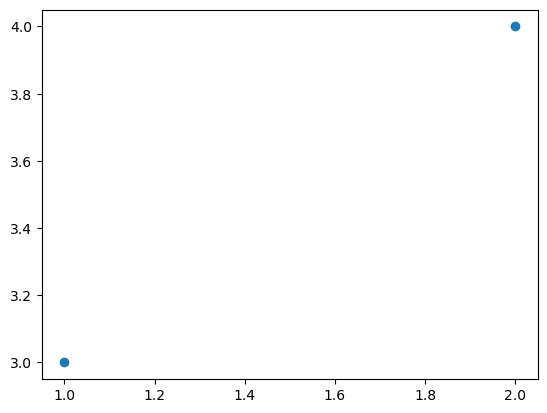

In [40]:

import torch
import matplotlib.pyplot as plt

t8 = torch.tensor([[1, 2], [3, 4]])

plt.plot(t8[0], t8[1], 'o')
plt.show()

In [43]:
# ma trận nghịch đảo

t3, torch.inverse(t3), t3.inverse()


(tensor([[21., 22., 21.,  9.],
         [ 7.,  7., 12., 14.],
         [19.,  5., 12., 14.],
         [13., 24., 11., 18.]]),
 tensor([[ 0.0025, -0.0886,  0.0774,  0.0074],
         [ 0.0149, -0.0316, -0.0353,  0.0446],
         [ 0.0526,  0.1033, -0.0497, -0.0680],
         [-0.0538,  0.0430,  0.0215,  0.0323]]),
 tensor([[ 0.0025, -0.0886,  0.0774,  0.0074],
         [ 0.0149, -0.0316, -0.0353,  0.0446],
         [ 0.0526,  0.1033, -0.0497, -0.0680],
         [-0.0538,  0.0430,  0.0215,  0.0323]]))

In [45]:
torch.mm(t3, t3.inverse()), torch.mm(t3.inverse(), t3)

(tensor([[ 1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  1.0000e+00, -3.7253e-09,  0.0000e+00],
         [ 0.0000e+00, -5.9605e-08,  1.0000e+00,  5.9605e-08],
         [ 5.9605e-08, -2.9802e-08,  0.0000e+00,  1.0000e+00]]),
 tensor([[ 1.0000e+00, -2.9802e-08, -1.1921e-07,  0.0000e+00],
         [-1.1921e-07,  1.0000e+00, -7.4506e-08, -1.1921e-07],
         [-1.4901e-08,  1.7881e-07,  1.0000e+00,  8.9407e-08],
         [ 1.1921e-07,  0.0000e+00,  5.9605e-08,  1.0000e+00]]))

## 5. Phân rã ma trận
Phân rã ma trận là một phép tính phổ biến trong các phép tính ma trận. Có nhiều loại phân rã ma trận khác nhau, ví dụ như phân rã QR, phân rã LU, phân rã Eigen, phân rã SVD, v.v. Mặc dù trong hầu hết các trường hợp, phân rã ma trận là quá trình phân chia ma trận thành tích của một số ma trận đặc biệt theo hình thức, nhưng theo bản chất, phân rã ma trận khám phá các thuộc tính sâu hơn của ma trận.

In [57]:
# eig 

t3, torch.linalg.eig(t3)

(tensor([[21., 22., 21.,  9.],
         [ 7.,  7., 12., 14.],
         [19.,  5., 12., 14.],
         [13., 24., 11., 18.]]),
 torch.return_types.linalg_eig(
 eigenvalues=tensor([57.3224+0.0000j, 11.7508+0.0000j, -5.5366+6.6050j, -5.5366-6.6050j]),
 eigenvectors=tensor([[-0.6108+0.0000j,  0.5749+0.0000j, -0.5171+0.0986j, -0.5171-0.0986j],
         [-0.3459+0.0000j, -0.2919+0.0000j,  0.0177-0.4062j,  0.0177+0.4062j],
         [-0.4617+0.0000j,  0.3449+0.0000j,  0.6603+0.0000j,  0.6603-0.0000j],
         [-0.5422+0.0000j, -0.6821+0.0000j, -0.1316+0.3228j, -0.1316-0.3228j]])))

In [59]:

# svd
t3[:, -1] = t3[:, 1] * 3
u, s, v = torch.svd(t3)
u, s, v

(tensor([[-0.6676,  0.2025, -0.2243, -0.6804],
         [-0.2242,  0.2324, -0.7742,  0.5443],
         [-0.1981,  0.8040,  0.4901,  0.2722],
         [-0.6817, -0.5084,  0.3318,  0.4082]]),
 tensor([1.1313e+02, 1.9464e+01, 5.6775e+00, 8.8685e-07]),
 tensor([[-2.4941e-01,  7.4738e-01,  6.1580e-01, -0.0000e+00],
         [-2.9708e-01, -1.0785e-01,  1.0572e-02,  9.4868e-01],
         [-2.3501e-01,  5.7018e-01, -7.8719e-01,  1.6785e-07],
         [-8.9124e-01, -3.2355e-01,  3.1717e-02, -3.1623e-01]]))

In [60]:
torch.diag(s), torch.mm(torch.mm(u, torch.diag(s)), v.t())

(tensor([[1.1313e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 1.9464e+01, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 5.6775e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 8.8685e-07]]),
 tensor([[21.0000, 22.0000, 21.0000, 66.0000],
         [ 7.0000,  7.0000, 12.0000, 21.0000],
         [19.0000,  5.0000, 12.0000, 15.0000],
         [13.0000, 24.0000, 11.0000, 72.0000]]))

In [61]:
u_reduced = u[:, [0, 1, 2]]
s_reduced = s[[0, 1, 2]]
v_reduced = v[:, [0, 1, 2]].t()
torch.mm(u_reduced * s_reduced, v_reduced)

tensor([[21.0000, 22.0000, 21.0000, 66.0000],
        [ 7.0000,  7.0000, 12.0000, 21.0000],
        [19.0000,  5.0000, 12.0000, 15.0000],
        [13.0000, 24.0000, 11.0000, 72.0000]])